In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

import sys
import os

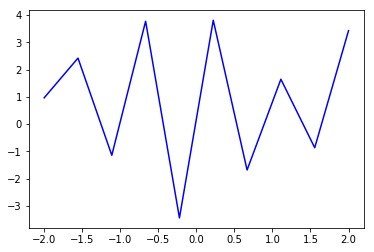

In [165]:
x = np.linspace(-2, 2, 10)
y = 3.*np.sin(2.*math.pi*x/1) +0.5*x**2 + np.random.normal(0, 1.5, x.shape)

plt.plot(x, y, 'b-')
plt.show()

In [166]:
q_vec = 3.*np.array([y[1]-y[0]]+list(y[2:]-y[:-2])+[y[-1]-y[-2]])
n = x.size
print('n: ', n)
A_mat = 4.*np.eye(n,n) + np.eye(n,n,1) + np.eye(n,n,-1)
A_mat[0,0] = 2
A_mat[-1,-1]=2

D_vec = np.linalg.solve(A_mat, q_vec)

('n: ', 10)


In [167]:
# Interpolation:
coefficients = np.column_stack((y[:-1], D_vec[:-1], 3.*(y[1:]-y[:-1])-2.*D_vec[:-1]-D_vec[1:],2.*(y[:-1]-y[1:])+D_vec[:-1]+D_vec[1:]))
print('Coefficients: ', coefficients.shape)

('Coefficients: ', (9, 4))


('t_poly: ', (4, 20))
(9, 20)


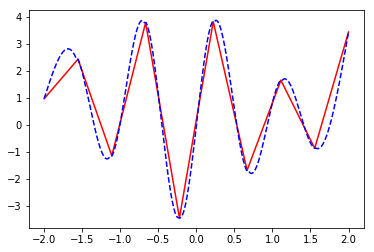

In [172]:
t_seq = np.linspace(1e-6, 1, 20)
t_poly = np.vstack((np.ones(t_seq.shape), t_seq, t_seq**2, t_seq**3))
print('t_poly: ', t_poly.shape)

y_interp = np.dot(coefficients, t_poly)
print(y_interp.shape)
y_interp = y_interp.flatten()

plt.plot(x, y, 'r-')
plt.plot(np.linspace(-2, 2, y_interp.size),y_interp, 'b--')
plt.show()